# Introduction

This notebook contains code used to create *most of the viz used in my lecture on data viz principles



# Packages

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
import matplotlib.patheffects as path_effects

from PIL import Image
import requests
from io import BytesIO


from highlight_text import htext

# Data

In [2]:
df = pd.read_csv("../data/pl_goal_summary_data.csv")
df.head()

,season_id,team,goals_for,goals_against,goal_diff,team_season
0,2010,Arsenal,72.0,43.0,29.0,Arsenal 2010/2011
1,2010,Aston Villa,48.0,59.0,-11.0,Aston Villa 2010/2011
2,2010,Birmingham,37.0,58.0,-21.0,Birmingham 2010/2011
3,2010,Blackburn,46.0,59.0,-13.0,Blackburn 2010/2011
4,2010,Blackpool,55.0,78.0,-23.0,Blackpool 2010/2011


# Reset Function

In [3]:
def reset_matplotlib():
    mpl.rcParams.update(mpl.rcParamsDefault)

# Figures and Axes

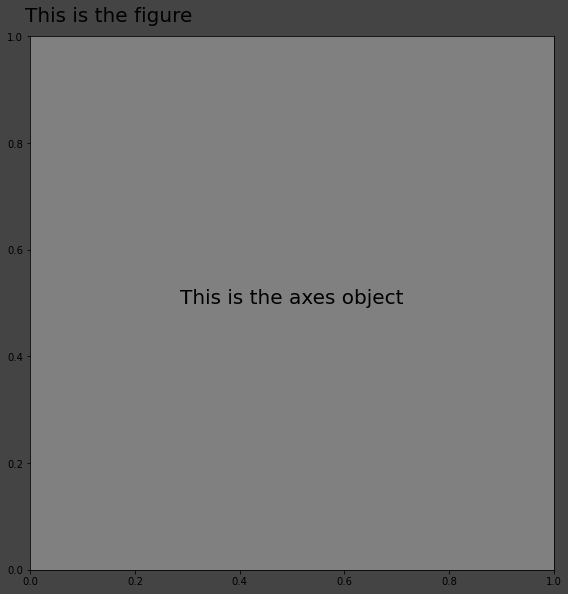

In [4]:

fig, ax = plt.subplots(figsize=(8,8))

fig.set_facecolor("#444444")
ax.patch.set_facecolor("grey")

fig.text(0.05,1,"This is the figure", fontsize=20)
ax.text(0.5,0.5,"This is the axes object", ha="center", fontsize=20)

plt.tight_layout()
plt.show()

# Lines

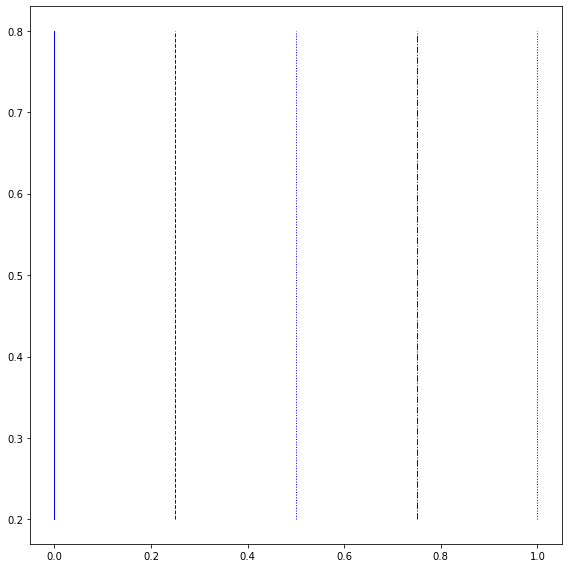

In [5]:

fig, ax = plt.subplots(figsize=(8,8))
xs = np.linspace(0,1,5)
linestyles = ["-","--","dotted","-.",":"]

y = [0.2,0.8]


for x, linestyle in zip(xs,linestyles):
    ax.plot([x,x],[y[0],y[1]],color="blue", lw=1, ls=linestyle)

fig.set_facecolor("w")
ax.patch.set_facecolor("w")


plt.tight_layout()
plt.show()

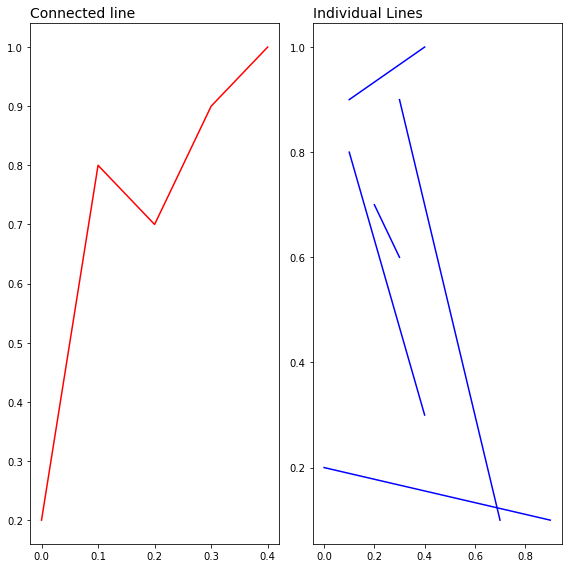

In [6]:

fig, (ax,ax1) = plt.subplots(1,2,figsize=(8,8))

fig.set_facecolor("w")
ax.patch.set_facecolor("w")

x = [0,0.1,0.2,0.3,0.4]
y = [0.2,0.8,0.7,0.9,1]

ax.plot(x,y,color="red")
ax.set_title("Connected line", loc="left", fontsize=14)

ex = [0.9,0.4,0.3,0.7,0.1]
ey = [0.1,0.3,0.6,0.1,0.9]

for x,y,ex,ey in zip(x,y,ex,ey):
    ax1.plot([x,ex],[y,ey], color="blue")

ax1.set_title("Individual Lines", loc="left", fontsize=14)


plt.tight_layout()
plt.show()

# Markers

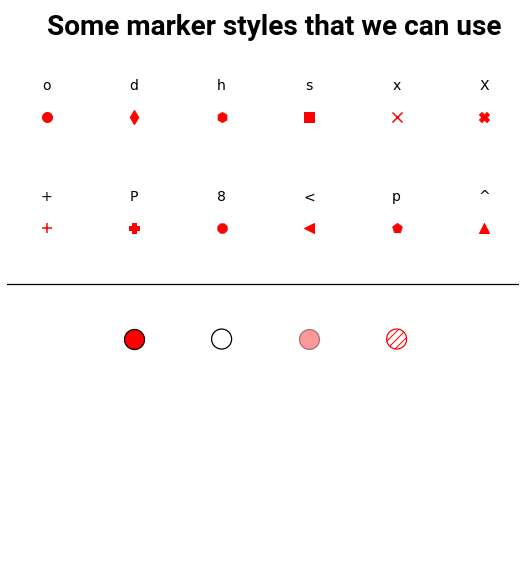

In [7]:

fig, ax = plt.subplots(figsize=(8,8))

fig.set_facecolor("w")
ax.patch.set_facecolor("w")

xs = np.linspace(0,1,10)
markers = ['o','d','h','s','x','X','+','P','8','<',"p","^"]

i = 0.8
k = 0
for m in markers:
    ax.scatter(xs[k],i,marker=m,s=100, c="red")
    ax.text(xs[k],i+0.05,m,color="k",fontsize=14, ha="center")
    k += 1
    if k >=6:
        i = i - 0.2
        k = 0

ax.text(0,0.95,"Some marker styles that we can use", fontsize=28, fontfamily="Roboto",fontweight="bold")

ax.plot([-0.5,1],[0.5,0.5], color="k",lw=1.25)



ax.scatter(xs[1],0.4,s=400, color="red", edgecolors="k",lw=1.25)
ax.scatter(xs[2],0.4,s=400, color="none",edgecolors="k",lw=1.25)
ax.scatter(xs[3],0.4,s=400, color="red",edgecolors="k",lw=1.25, alpha=0.4)
ax.scatter(xs[4],0.4,s=400, color="none",edgecolors="red",lw=1.25, alpha=1, hatch="///")


ax.axis("off")

ax.set_ylim(0,1)
ax.set_xlim(-0.05,0.6)

plt.tight_layout()
plt.show()

# Ticks and Spines

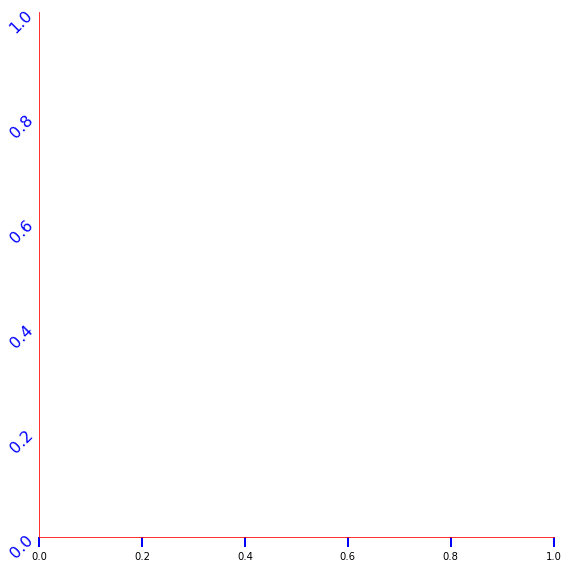

In [8]:

fig, ax = plt.subplots(figsize=(8,8))
fig.set_facecolor("w")
ax.patch.set_facecolor("w")

ax.set_xlim(0,1)
ax.set_ylim(0,1)

spines = ["top","right","bottom","left"]
for s in spines:
    if s in ["top","right"]:
        ax.spines[s].set_visible(False)
    else:
        ax.spines[s].set_color("red")

    ax.tick_params(axis="x",color="blue",length=10, width=2)
    ax.tick_params(axis="y",length=0, labelcolor="blue",labelsize=16, labelrotation=45)
    


plt.tight_layout()
plt.show()

# Text

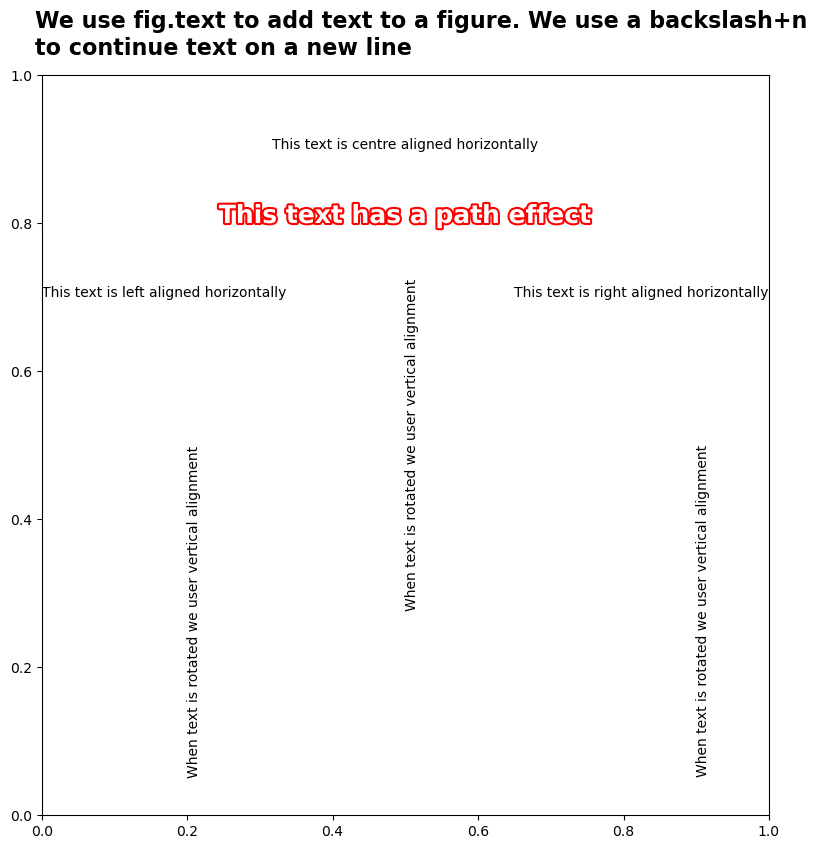

In [9]:
reset_matplotlib()
fig, ax = plt.subplots(figsize=(8,8))
fig.set_facecolor("w")
ax.patch.set_facecolor("w")

ax.set_xlim(0,1)
ax.set_ylim(0,1)

# fig text
fig.text(0.05,1, "We use fig.text to add text to a figure. We use a backslash+n\nto continue text on a new line", fontsize=16, fontweight="bold")

# ha text
ax.text(0.5,0.9,"This text is centre aligned horizontally", ha="center")
ax.text(0,0.7,"This text is left aligned horizontally", ha="left")
ax.text(1,0.7,"This text is right aligned horizontally", ha="right")

# va text
ax.text(0.2,0.05,"When text is rotated we user vertical alignment", va="bottom", rotation=90)

ax.text(0.5,0.5,"When text is rotated we user vertical alignment", va="center", rotation=90)

ax.text(0.9,0.5,"When text is rotated we user vertical alignment", va="top", rotation=90)

# path effects
t = ax.text(0.5, 0.8, "This text has a path effect", ha="center", fontsize=18, fontweight="bold", color="w")
t.set_path_effects([path_effects.withStroke(linewidth=3, foreground="red")])





plt.tight_layout()
plt.show()

# Alpha

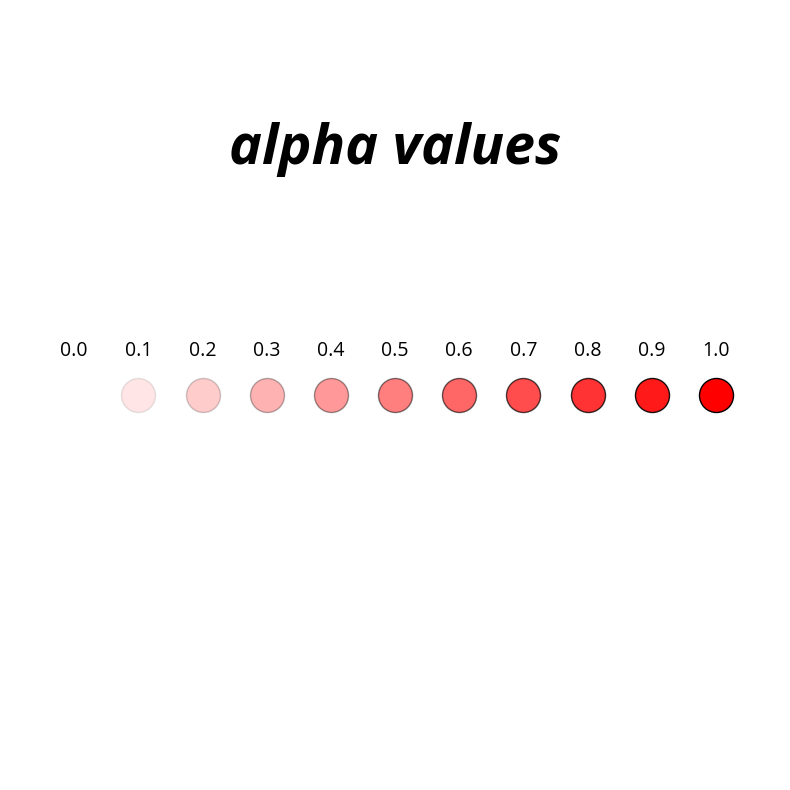

In [10]:
reset_matplotlib()
fig, ax = plt.subplots(figsize=(8,8))
fig.set_facecolor("w")
ax.patch.set_facecolor("w")

ax.set_xlim(-0.1,1.1)
ax.set_ylim(0,1)

xs = np.linspace(0,1,11)
ys = [0.5]*11
a =  np.linspace(0,1,11)

for x,y,a in zip(xs, ys, a):
    ax.scatter(x,y,s=600,color="red",edgecolors="k",alpha=a)
    ax.text(x,y+0.05,str(round(a,2)),ha="center",fontsize=14,fontfamily="Open Sans")


ax.axis("off")

ax.text(0.5,0.8,"alpha values", fontsize=40,
        fontfamily="Open Sans", fontweight="bold",
        fontstyle="italic", ha="center")

plt.tight_layout()
plt.show()

# Default Matplotlib Graphic

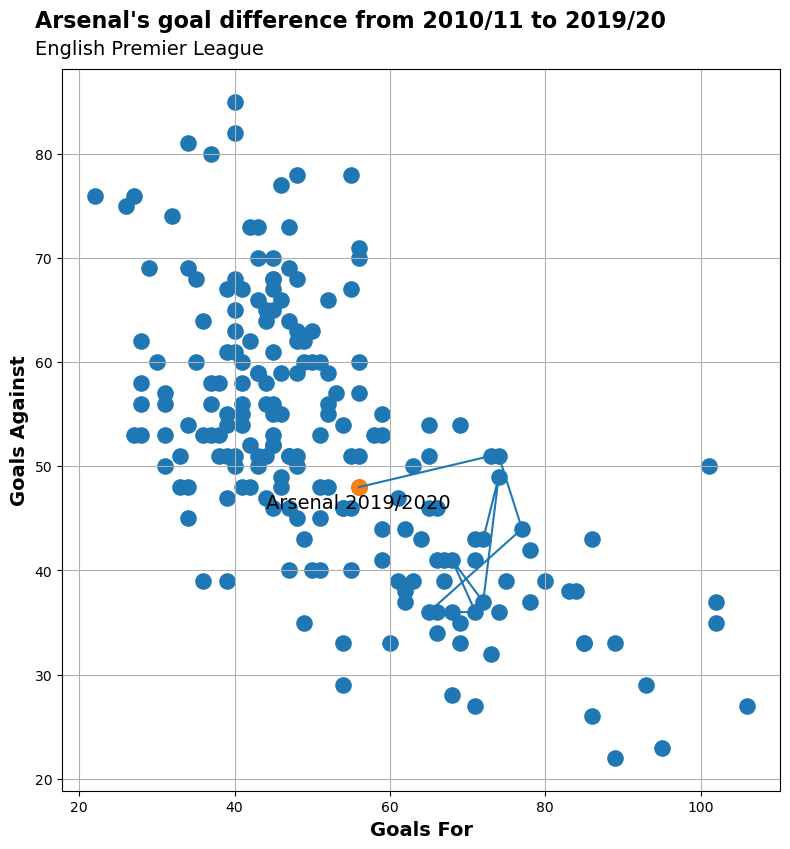

In [11]:
# selectiing team
team = "Arsenal"

# creating figure and axes
fig, ax = plt.subplots(figsize=(8,8))
fig.set_facecolor("w")

# adding a grid
ax.grid()

# getting our data to plot

x = df.goals_for.tolist()
y = df.goals_against.tolist()

ax.scatter(x,y,s=120)

# getting data for specified team
x = df[df.team == team].goals_for.tolist()
y = df[df.team == team].goals_against.tolist()
t = df[df.team == team].team_season.tolist()

# plotting a line to track team's change over seasons
ax.plot(x,y)

# plotting team's most recent season
ax.scatter(x[-1],y[-1],s=120)
t = ax.text(x[-1],y[-1]-2,t[-1],color='k',fontsize=14, ha="center")

# adding title and subtitle
fig.text(0.05,1,"{}'s goal difference from 2010/11 to 2019/20\n".format(team), fontsize=16, fontweight="bold")        
fig.text(0.05,1,"English Premier League",fontweight="regular", fontsize=14)

# adding x and y labels
ax.set_xlabel("Goals For", fontweight="bold", fontsize=14)
ax.set_ylabel("Goals Against", fontweight="bold", fontsize= 14)


plt.tight_layout()
plt.show()


/Users/peter.mckeever/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


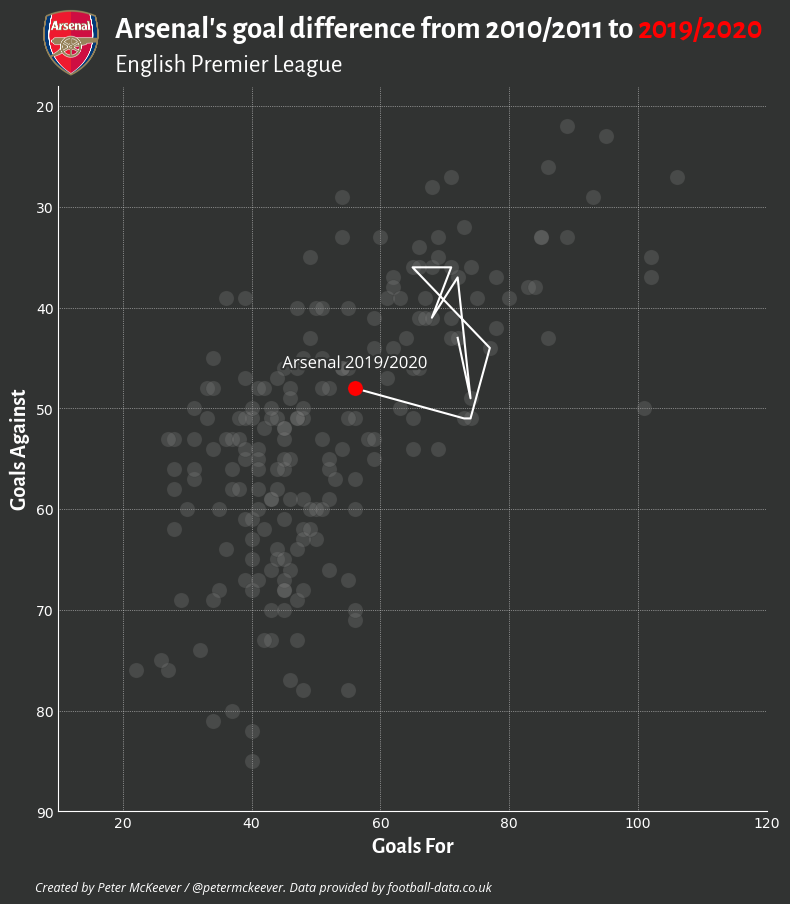

In [12]:
team = "Arsenal"

title_font = "Alegreya Sans"
body_font = "Open Sans"
text_color = "w"
background = "#313332"
filler = "grey"
primary = "red"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10


fig, ax = plt.subplots(figsize=(8,8))
fig.set_facecolor(background)
ax.patch.set_alpha(0)

ax.grid(ls="dotted",lw="0.5",color="lightgrey", zorder=1)

x = df.goals_for.tolist()
y = df.goals_against.tolist()

ax.scatter(x,y,s=120,color=filler,edgecolors=background, alpha=0.3, lw=0.5, zorder=2)


x = df[df.team == team].goals_for.tolist()
y = df[df.team == team].goals_against.tolist()
t = df[df.team == team].team_season.tolist()

ax.plot(x,y, zorder=3, color=text_color)

ax.scatter(x[-1],y[-1],s=120,color=primary,edgecolors=background, alpha=1, lw=.25, zorder=4)
t = ax.text(x[-1],y[-1]-2,t[-1],color=text_color,fontsize=12, ha="center", fontfamily=body_font)
t.set_path_effects([path_effects.withStroke(linewidth=3,foreground=background)])


ssn_start = df[df.team == team].season_id.iloc[0]
ssn_end = df[df.team == team].season_id.iloc[-1]

ssn_start = str(ssn_start)+"/"+str(ssn_start+1)
ssn_end = str(ssn_end)+"/"+str(ssn_end+1)

s = "{}'s goal difference from {} to <{}>\n"
htext.fig_htext(s.format(team,ssn_start,ssn_end),0.15,0.99,highlight_colors=[primary], highlight_weights=["bold"],string_weight="bold",fontsize=22, fontfamily=title_font,color=text_color)

fig.text(0.15,1,"English Premier League",fontweight="regular", fontsize=18,fontfamily=title_font, color=text_color)

ax.set_xlabel("Goals For", fontfamily=title_font, fontweight="bold", fontsize=16, color=text_color)
ax.set_ylabel("Goals Against", fontfamily=title_font, fontweight="bold", fontsize= 16, color=text_color)

ax.tick_params(axis="both",length=0)

ax.set_ylim(90,18)
ax.set_xlim(10,120)


spines = ["top","right","bottom","left"]
for s in spines:
    if s in ["top","right"]:
        ax.spines[s].set_visible(False)
    else:
        ax.spines[s].set_color(text_color)




ax2 = fig.add_axes([0.02,0.96,0.15,0.15]) # badge
ax2.axis("off")
url = "https://logos-world.net/wp-content/uploads/2020/05/Arsenal-Logo.png"
response = requests.get(url)
img = Image.open(BytesIO(response.content))
ax2.imshow(img)

fig.text(0.05, -0.025, "Created by Peter McKeever / @petermckeever. Data provided by football-data.co.uk",
        fontstyle="italic",fontsize=9, fontfamily=body_font, color=text_color)




plt.tight_layout()
plt.show()
